<a href="https://colab.research.google.com/github/milindtanna/PRODIGY_ML_01/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows and inspect the columns
print(data.head())
print(data.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [24]:
# Select relevant columns for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].values

# Handling missing values (if any)
X = X[~np.isnan(X).any(axis=1)]  # Drop rows with NaN values, if any


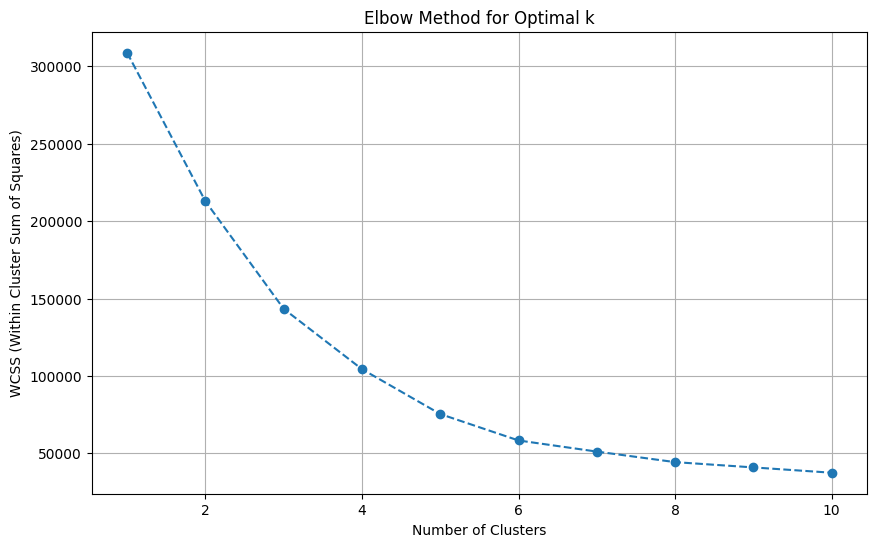

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Step 3: Determine the Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()



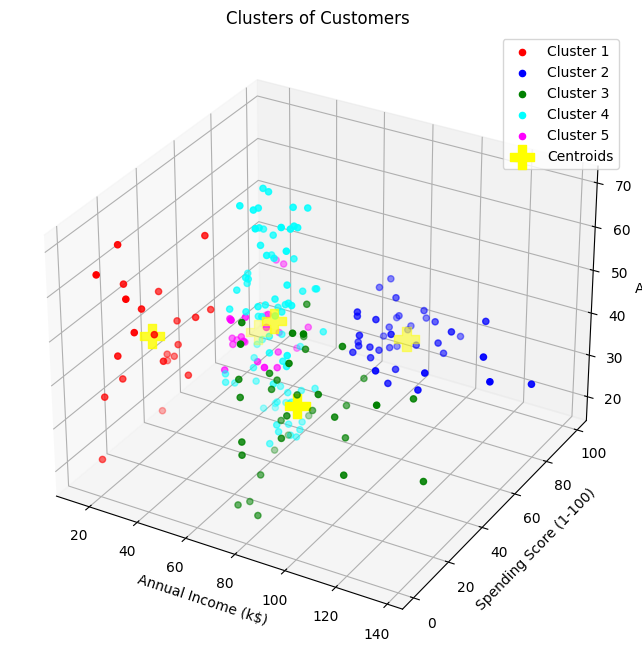

In [33]:
# Step 4: Apply K-means Clustering
optimal_k = 5  # Example: Choose the optimal number of clusters from the elbow method

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)  # Explicitly set n_init
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters (you can customize this part based on your preferences)
plt.figure(figsize=(12, 8))

# Example of 3D visualization (assuming X has 3 features)
ax = plt.axes(projection='3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], c='red', label='Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], c='blue', label='Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], c='green', label='Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], c='cyan', label='Cluster 4')
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], c='magenta', label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='yellow', label='Centroids', marker='P')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.legend()
plt.show()


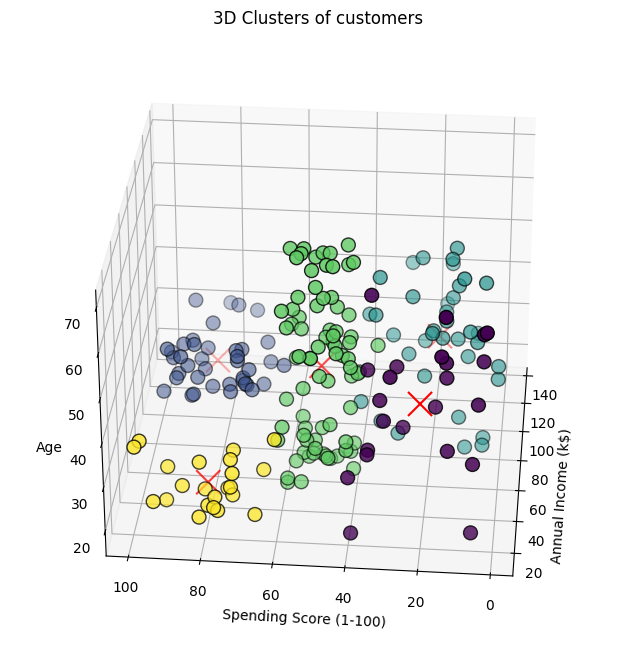

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis', edgecolor='k', s=100)
centroid_scatter = ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=300)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.title('3D Clusters of customers')

# Add interactive rotation
ax.view_init(30, 185)  # Adjust view angle for better visibility
plt.show()


In [28]:
import plotly.express as px

fig = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Cluster',
                    symbol='Cluster', opacity=0.8, size_max=10)
fig.update_layout(title='3D Clusters of customers', scene=dict(xaxis_title='Annual Income (k$)',
                                                              yaxis_title='Spending Score (1-100)',
                                                              zaxis_title='Age'))
fig.show()
